### Classifying movie 🎥 reviews

In [1]:
data_length=1000

#### Loading the IMDB dataset

The argument *num_words* means we’ll only keep the top *num_words* most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=data_length)

17465344/17464789 [==============================] - 2s 0us/step


#### Preparing the data

We will turn the lists into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then we will use as the first layer in our network a Dense layer, capable of handling floating-point vector data.

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=data_length):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building the network

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup we’ll ever encounter. A type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with relu activations.

The argument being passed to each Dense layer (16) is the number of hidden units of the layer.

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(data_length,)))
model.add(layers.Dense(16, activation='relu'))

Because we’re facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), it’s best to use the *binary_crossentropy* loss.

In [5]:
model.add(layers.Dense(1, activation='sigmoid'))

#### Setting aside a validation set

In order to monitor during training the accuracy of the model on data it has never seen before, we’ll create a validation set by setting apart *data_length* samples from the original training data.

In [6]:
x_val = x_train[:data_length]
partial_x_train = x_train[data_length:]
y_val = y_train[:data_length]
partial_y_train = y_train[data_length:]

#### Compiling the model

We need to choose a loss function and an optimizer. Crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

We’ll also monitor accuracy during training.

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We’re passing the optimizer, loss function, and metrics as strings, which is possible because *rmsprop*, *binary_crossentropy*, and *accuracy* are packaged as part of Keras.

#### Training the model

We’ll train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the *data_length* samples that we set apart. We do so by passing the validation data as the *validation_data* argument.

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 1s 22us/step - loss: 0.5330 - acc: 0.7554 - val_loss: 0.4106 - val_acc: 0.8300
Epoch 2/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.3775 - acc: 0.8467 - val_loss: 0.3476 - val_acc: 0.8490
Epoch 3/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.3332 - acc: 0.8627 - val_loss: 0.3302 - val_acc: 0.8580
Epoch 4/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.3162 - acc: 0.8705 - val_loss: 0.3204 - val_acc: 0.8630
Epoch 5/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.3087 - acc: 0.8725 - val_loss: 0.3302 - val_acc: 0.8530
Epoch 6/20
24000/24000 [==============================] - 0s 9us/step - loss: 0.3045 - acc: 0.8715 - val_loss: 0.3154 - val_acc: 0.8650
Epoch 7/20
24000/24000 [==============================] - 0s 9us/step - loss: 0.3008 - acc: 0.8760 - val_loss: 0.3270 - val_acc: 0.864

#### Plotting the training and validation loss

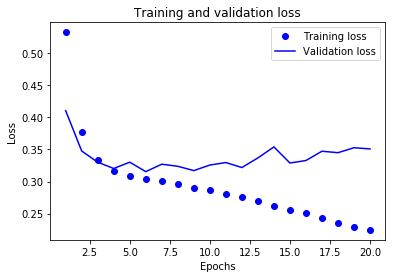

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

####  Plotting the training and validation accuracy

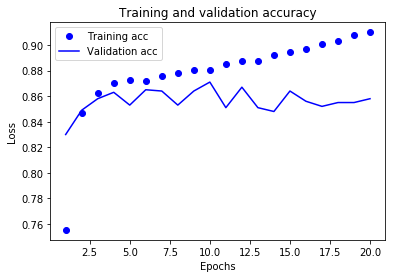

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()